# A/B testing Analysis for Smart Ad

>>**In this project, I will perform an A/B testing Analysis to see whether the treatment group is most likely to take the BIO questionnaire or not**

## First I will import the needed libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

## Reading the dataset

In [2]:
df = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,7/10/2020,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,7/7/2020,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,7/5/2020,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,7/3/2020,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,0


## Assessment and clean part

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [4]:
# There is no duplicate data
df['auction_id'].nunique()

8077

In [5]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [6]:
# There is no Null values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

> **The data is clean** 

## Analysis Part

In [7]:
print("number of control group: ",df[df['experiment'] == 'control'].shape[0])
print("number of treatment group: ",df[df['experiment'] == 'exposed'].shape[0])
print("yes rate ",  df['yes'].mean())

number of control group:  4071
number of treatment group:  4006
yes rate  0.07081837315835088


In [8]:
print(df.groupby('experiment')['yes'].mean())
print('')
print("it seems that the treatment group take the BIO questionnaire, but we will see if this is true")

experiment
control    0.064849
exposed    0.076885
Name: yes, dtype: float64

it seems that the treatment group take the BIO questionnaire, but we will see if this is true


### The Hypotheses of our testing

>$H_0: \mu_c \geq \mu_t$ 

>$H_A: \mu_ c < \mu_t$ 

## A\B test by z-test part

In [9]:
n_exposed = df[df['experiment'] == 'exposed'].shape[0]
n_control = df[df['experiment'] == 'control'].shape[0]
p_exposed= df[(df['experiment'] == 'exposed')& df['yes'] == 1].shape[0]
p_control= df[(df['experiment'] == 'control')& df['yes'] == 1].shape[0]
n_exposed, n_control, p_exposed, p_control

(4006, 4071, 308, 264)

In [10]:
stats, p_value = proportions_ztest([p_exposed, p_control], [n_exposed, n_control ], alternative = 'larger')
stats, p_value

(2.108290999972843, 0.017502912984162258)

>> **From the results of the z test, we reject the null hypothesis. The treatment group is most likely to take the BIO questionnaire compared to the control group.**

## A\B test by algorithm part

In [11]:
boot1 = []
for x in range(1000):
    d = df.sample(frac = 1, replace = True).groupby('experiment')['yes'].mean()
    boot1.append(d)

In [12]:
boot1 = pd.DataFrame(boot1)
boot1.head()

experiment,control,exposed
yes,0.062469,0.079330
yes,0.065425,0.075576
yes,0.066999,0.074840
yes,0.063176,0.079571
yes,0.061469,0.075092


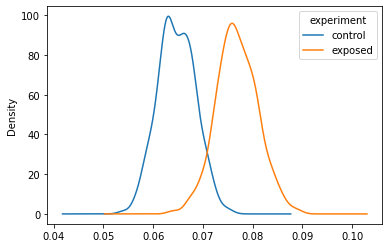

In [13]:
boot1.plot.kde()

In [14]:
boot1['diffs'] = (boot1['exposed'] - boot1['control'])*100
boot1.head()

experiment,control,exposed,diffs
yes,0.062469,0.079330,1.686099
yes,0.065425,0.075576,1.015043
yes,0.066999,0.074840,0.784123
yes,0.063176,0.079571,1.639496
yes,0.061469,0.075092,1.362276


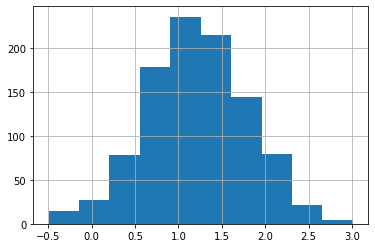

In [15]:
boot1['diffs'].hist()

In [16]:
(boot1['diffs']< 0).mean()

0.023

>**The results of applying the A/B test algorithm are the same as the results of the z test, we reject the null hypothesis. The treatment group is most likely to take the BIO questionnaire compared to the control group**